# Вариант № 3
Функция:
$$ f(x) = x_{1}^{2} + x_{2}^{2} + x_{3}^{2} - x_{1}x_{2} + x_{1} - 2 x_{3}$$
Задание:
Численно найти минимум функции $f(x)$ используя метод оптимизации LBFGS и метод Ньютона

In [31]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [32]:
def f(x):
    x1, x2, x3 = x
    return x1*x1 + x2*x2 + x3*x3 - x1*x2 + x1 - 2*x3

In [42]:
x0 = np.array([10, 20, 30])
trajectory = [x0]
minimization_result = minimize(f, x0, method='L-BFGS-B', callback=lambda x: trajectory.append(x))
x_min = minimization_result.x

print(minimization_result)
print(trajectory)
print(f'{x_min=}')

      fun: -1.333333333331765
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.55271366e-07, 1.93178806e-06, 4.88498134e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-0.66666578, -0.33333193,  1.00000024])
[array([10, 20, 30]), array([ 9.92343756, 17.70315468, 25.5594325 ]), array([ 2.25400639,  3.9872351 , -0.49260678]), array([1.34444173, 0.66389551, 0.55912293]), array([-0.58976326, -0.33425708,  0.94248578]), array([-0.66674755, -0.33334284,  0.9996964 ]), array([-0.66666578, -0.33333193,  1.00000024])]
x_min=array([-0.66666578, -0.33333193,  1.00000024])


end_point_plot=[<mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fa73fd2c820>]


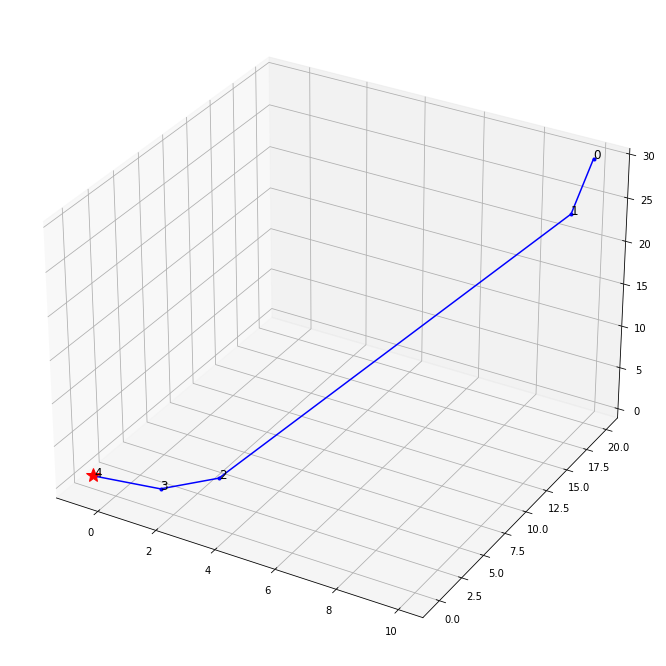

In [65]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(projection='3d')
ax.plot(*list(zip(*trajectory)), 'b-', marker='.')
end_point_plot = ax.plot(*x_min, 'r*', zorder=2)
end_point_plot[0].set_markersize(15)

annotation_eps = 0.01
for i, x in enumerate(trajectory):
    size = 12
    if np.linalg.norm(x_min - x) > annotation_eps:
        ax.text(*x, str(i), size=size, zorder=3, color='k') 
